In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
adult_census = pd.read_csv("../datasets/adult-census.csv")

In [4]:
adult_census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
target_column = 'class'
adult_census[target_column].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

In [6]:
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [9]:
numerical_columns = [
    'age',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
]

categorical_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
]
# a coluna 'class' nao entrou em nenhuma pois ela é a coluna alvo

all_columns = numerical_columns + categorical_columns + [target_column]
                                                        # entre [] pois eh str e precisa ser list

# coloca em ordem, primeiro numerica, depois colunas str e por fim a coluna alvo
adult_census = adult_census[all_columns]

In [13]:
print(f"O data contém {adult_census.shape[0]} amostras e {adult_census.shape[1]} colunas")
print(f"E contém {adult_census.shape[1] - 1} features (características)")

O data contém 48842 amostras e 14 colunas
E contém 13 features (características)


## Inspeção visual dos dados

Até agora fizemos somente uma visualização dos dados de maneira crua, sem relacionar os dados em si. Para uma criação de um modelo preditivo é interessante visualizar os dados e relacioná-los para melhor interpretar e conseguir produzir um modelo preditivo bom para o seu target.

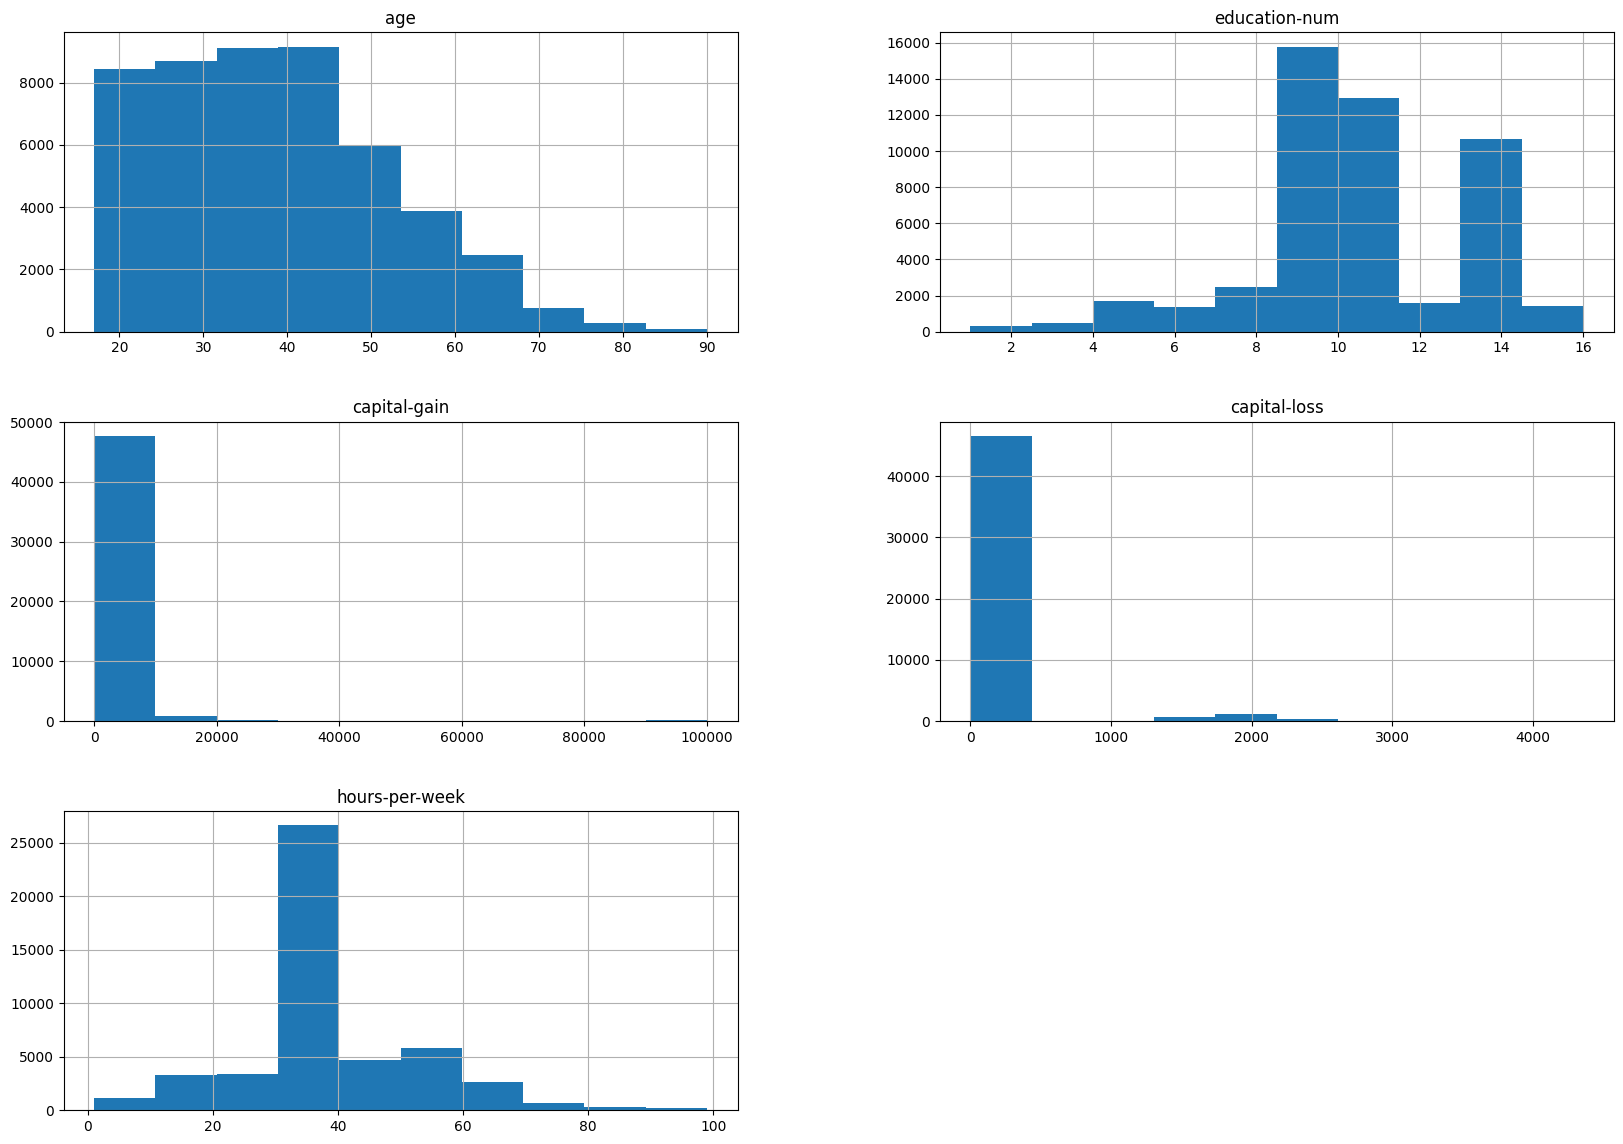

In [15]:
_ = adult_census.hist(figsize=(20, 14))

<div style="background-color: #faebcc; color: #8a6d3b; padding: 2px;">
<h4>Note:</h4><p>Na célula anterior, usamos o seguinte padrão: _ = func(). Fazemos isso para evitar mostrar a saída de func() que neste caso não é tão útil. Na verdade, atribuímos a saída de func() à variável _ (chamada de sublinhado). Por convenção, em Python a variável sublinhado é usada como uma variável "lixo" para armazenar resultados que não nos interessam.</p>
</div>

In [16]:
adult_census['sex'].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

In [17]:
adult_census['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [19]:
# education-num -> anos estudando
# education -> nível que a pessoa estudou

# crosstab cria uma tabela com a quantidade de dados em cada classe da educação e
# relacionando com a quantidade de tempo que a pessoa ficou na escola
pd.crosstab(index=adult_census['education'], columns=adult_census['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


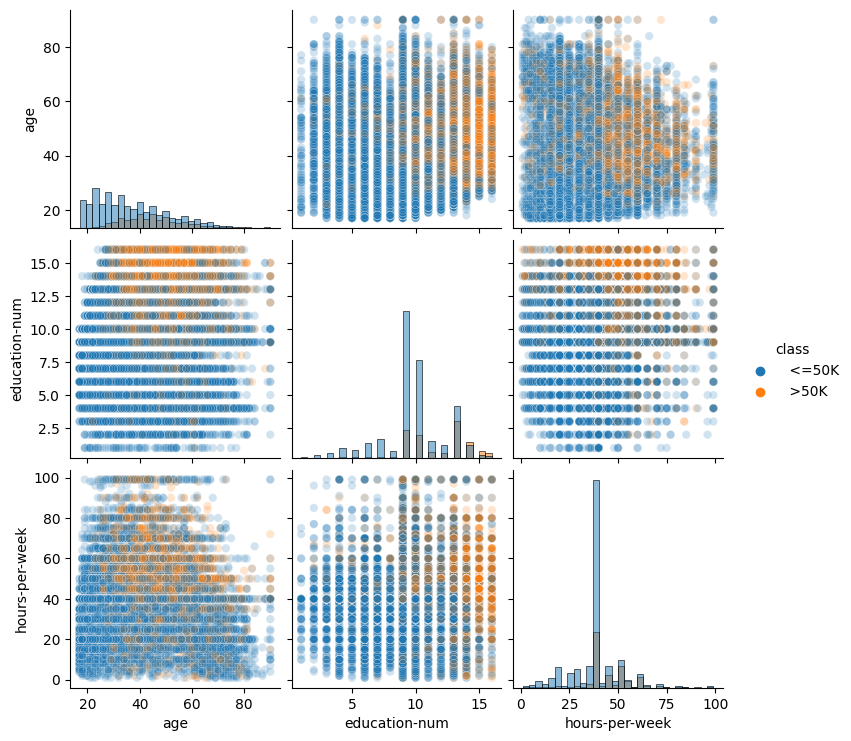

In [22]:
columns = ['age', 'education-num', 'hours-per-week']
_ = sns.pairplot(
    data=adult_census,
    vars= columns,
    hue=target_column,
    plot_kws={'alpha': 0.2},
    diag_kind='hist',
    diag_kws={'bins': 30},
)

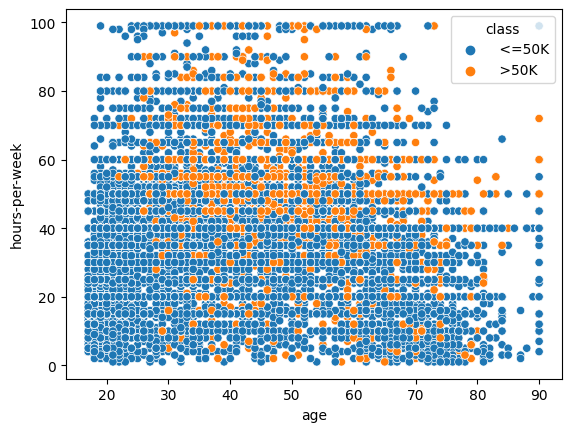

In [23]:
_ = sns.scatterplot(
    data=adult_census,
    x='age',
    y='hours-per-week',
    hue=target_column
)

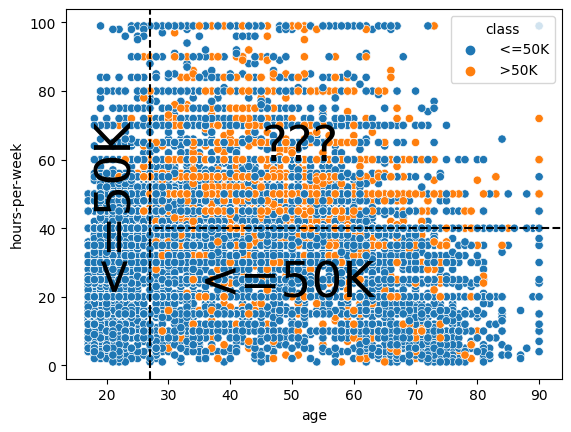

In [24]:
_ = sns.scatterplot(
    data=adult_census,
    x='age',
    y='hours-per-week',
    hue=target_column
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--")

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)